Janine Ali Ahmad DIA6

<div style="background-color:#4682B4; padding:20px; border-radius:5px; text-align:center">
    <h2 style="color:#001f3d; font-size:36px;">Diamonds : Cleaning the Datasets</h2>
</div>


<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Introduction</h2>
</div>

We have 6 datasets, one for each shape of diamond we will use: cushion, heart, emerald, oval, round, and princess. We also have folders with corresponding images. 

The aim of this notebook is to:

1. Produce a clean dataset for price prediction purposes.
2. Produce a clean dataset for image-based quality assessments.
3. Perform data analysis to better understand our data and the various features involved.

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Loading the datasets</h2>
</div>

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Imports</h4>
</div>

In [7]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.polynomial.polynomial import Polynomial
import matplotlib.image as mpimg
from scipy.stats import chi2_contingency
from itertools import combinations

#to avoid warnings display
import warnings
warnings.filterwarnings('ignore')


<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Load and visualize</h4>
</div>

In [9]:
df_cushion = pd.read_csv("data_cushion.csv")
df_emerald = pd.read_csv("data_emerald.csv")
df_heart = pd.read_csv("data_heart.csv")
df_oval = pd.read_csv("data_oval.csv")
df_princess = pd.read_csv("data_princess.csv")
df_round = pd.read_csv("data_round.csv")

In [10]:
df_cushion

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,1638147,CUSHION,0.55,SI2,E,EX,EX,VG,N,5.05-4.35×2.94,"1,378.65"
1,1630155,CUSHION,0.50,VVS1,FANCY,EX,EX,VG,F,4.60-4.31×2.92,"1,379.74"
2,1612606,CUSHION,0.51,VS2,H,EX,EX,VG,N,4.71-4.35×2.94,"1,380.19"
3,1638140,CUSHION,0.50,VS2,H,EX,EX,VG,N,4.91-4.26×2.88,"1,380.61"
4,1536093,CUSHION,0.53,SI1,D,EX,VG,VG,N,4.70-4.46×3.01,"1,383.13"
...,...,...,...,...,...,...,...,...,...,...,...
1666,200763-184,CUSHION,2.20,VS1,D,EX,EX,EX,F,8.29-7.19×4.79,"30,427.92"
1667,210504-360,CUSHION,2.40,VS2,G,EX,EX,EX,N,7.59-7.38×5.00,"30,474.04"
1668,200712-296,CUSHION,2.01,IF,D,EX,EX,EX,M,7.87-6.64×4.51,"30,806.38"
1669,201223-84,CUSHION,2.39,VS2,F,EX,EX,VG,N,7.71-7.59×5.12,"30,949.54"


In [11]:
df_emerald

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,1760508,EMERALD,0.30,VVS2,D,EX,EX,GD,N,4.68-3.16×2.15,973.78
1,1794389,EMERALD,0.30,VVS2,E,VG,VG,GD,N,4.62-3.19×2.03,974.29
2,1794388,EMERALD,0.30,VVS2,E,VG,VG,GD,N,4.75-3.06×2.09,974.29
3,1799836,EMERALD,0.30,VS1,D,VG,EX,VG,N,4.35-3.27×2.22,974.29
4,1800651,EMERALD,0.30,VS1,D,VG,VG,GD,N,4.40-3.28×2.25,974.29
...,...,...,...,...,...,...,...,...,...,...,...
575,1749111,EMERALD,0.50,VS2,D,EX,VG,GD,F,5.13-3.78×2.58,"1,661.27"
576,1797109,EMERALD,0.55,VS1,I,EX,EX,VG,M,5.46-3.98×2.62,"1,661.66"
577,1643566,EMERALD,0.50,VS1,H,EX,VG,VG,N,5.22-3.84×2.53,"1,661.72"
578,1795704,EMERALD,0.51,SI1,D,EX,EX,VG,F,5.53-3.67×2.47,"1,690.32"


In [12]:
df_heart

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,1747092,HEART,0.29,SI1,F,GD,VG,VG,F,3.96-4.62×2.81,829.54
1,1800754,HEART,0.30,VS1,J,EX,EX,EX,F,3.94-4.67×2.72,830.33
2,1786572,HEART,0.32,VS1,I,EX,VG,GD,N,4.07-4.80×2.83,831.26
3,1785300,HEART,0.30,SI2,F,VG,EX,VG,N,4.16-4.46×2.67,832.33
4,1771394,HEART,0.29,SI1,E,VG,VG,GD,N,4.22-4.59×2.59,837.87
...,...,...,...,...,...,...,...,...,...,...,...
340,1785288,HEART,0.30,SI1,F,EX,EX,VG,N,4.20-4.74×2.66,981.38
341,1777480,HEART,0.30,VVS1,H,EX,EX,GD,N,4.16-4.54×2.66,983.93
342,1787967,HEART,0.30,SI1,D,VG,EX,VG,N,3.93-4.58×2.76,984.43
343,1781400,HEART,0.39,SI1,G,VG,EX,VG,F,4.61-5.19×2.89,984.66


In [13]:
df_oval

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,1790107,OVAL,0.32,SI2,FANCY,EX,VG,GD,M,5.25-3.55×2.27,962.08
1,1777665,OVAL,0.30,VS2,F,VG,VG,VG,N,5.40-3.71×2.26,962.18
2,1740333,OVAL,0.32,VS2,D,EX,VG,GD,F,6.02-3.85×2.21,962.62
3,1781606,OVAL,0.31,VVS2,G,EX,VG,GD,N,5.90-3.70×2.29,963.03
4,1666055,OVAL,0.65,VS1,N,EX,EX,VG,M,7.31-4.65×2.88,963.92
...,...,...,...,...,...,...,...,...,...,...,...
673,1766992,OVAL,0.90,SI1,L,EX,EX,VG,F,7.33-5.47×3.38,"2,240.77"
674,210199-25,OVAL,1.02,VVS2,W-X,EX,EX,VG,F,7.27-5.36×3.45,"2,241.07"
675,1664766,OVAL,0.81,VS2,FANCY,EX,EX,VG,M,7.53-4.91×2.96,"2,242.06"
676,1668337,OVAL,0.72,SI1,J,EX,EX,EX,N,6.92-5.09×3.11,"2,243.22"


In [14]:
df_princess

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,1783153,PRINCESS,0.33,VVS2,E,EX,EX,GD,F,3.84-3.79×2.67,"1,010.59"
1,1765234,PRINCESS,0.34,VS1,F,EX,EX,VG,N,3.95-3.90×2.77,"1,010.91"
2,1775625,PRINCESS,0.33,VS1,D,EX,VG,GD,N,3.87-3.87×2.63,"1,012.26"
3,1649332,PRINCESS,0.50,SI2,K,EX,EX,GD,N,4.21-4.19×3.04,"1,012.33"
4,1786744,PRINCESS,0.43,VS2,J,EX,EX,GD,N,4.23-4.15×3.01,"1,012.43"
...,...,...,...,...,...,...,...,...,...,...,...
619,1638354,PRINCESS,0.52,SI1,D,EX,EX,EX,N,4.47-4.40×2.95,"1,504.71"
620,1765215,PRINCESS,0.59,SI2,H,VG,EX,GD,N,4.51-4.46×3.32,"1,505.69"
621,1623687,PRINCESS,0.50,SI1,D,EX,EX,EX,N,4.37-4.36×3.15,"1,505.96"
622,1636533,PRINCESS,0.51,SI1,F,EX,EX,VG,N,4.36-4.35×3.14,"1,506.27"


In [15]:
df_round

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,1783497,ROUND,0.30,VVS1,K,VG,EX,VG,N,4.36-4.40×2.59,826.78
1,1763841,ROUND,0.23,VS2,E,EX,EX,EX,N,3.95-3.97×2.42,951.72
2,1763837,ROUND,0.23,VS2,E,EX,EX,EX,N,3.95-3.98×2.40,951.72
3,1763842,ROUND,0.23,VS2,E,EX,EX,EX,N,3.99-4.01×2.38,951.72
4,1763839,ROUND,0.23,VS2,E,EX,EX,EX,N,3.94-3.97×2.40,951.72
...,...,...,...,...,...,...,...,...,...,...,...
2051,1751206,ROUND,0.50,SI1,E,EX,EX,EX,N,5.00-5.04×3.18,"2,453.10"
2052,1773024,ROUND,0.50,SI1,E,EX,EX,EX,N,5.03-5.06×3.16,"2,453.10"
2053,1789435,ROUND,0.50,VS2,D,VG,EX,VG,N,4.93-4.96×3.19,"2,453.20"
2054,1774887,ROUND,0.52,SI1,H,EX,EX,EX,N,5.11-5.13×3.20,"2,453.41"


<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Verify correct separation</h4>
</div>

In [17]:
print("Number of unique shapes in cushion dataset: ", df_cushion['Shape'].nunique())
print("Number of unique shapes in emerald dataset: ", df_emerald['Shape'].nunique())
print("Number of unique shapes in heart dataset: ", df_heart['Shape'].nunique())
print("Number of unique shapes in princess dataset: ", df_princess['Shape'].nunique())
print("Number of unique shapes in oval dataset: ", df_oval['Shape'].nunique())
print("Number of unique shapes in round dataset: ", df_round['Shape'].nunique())


Number of unique shapes in cushion dataset:  1
Number of unique shapes in emerald dataset:  1
Number of unique shapes in heart dataset:  1
Number of unique shapes in princess dataset:  1
Number of unique shapes in oval dataset:  1
Number of unique shapes in round dataset:  1


<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Diamonds Dataset for price prediction</h2>
</div>

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Concatenate the datasets</h4>
</div>

In [20]:
Diamonds_prices = pd.concat([df_cushion, df_emerald, df_heart, df_princess, df_round, df_oval], ignore_index=True)
Diamonds_prices

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,1638147,CUSHION,0.55,SI2,E,EX,EX,VG,N,5.05-4.35×2.94,"1,378.65"
1,1630155,CUSHION,0.50,VVS1,FANCY,EX,EX,VG,F,4.60-4.31×2.92,"1,379.74"
2,1612606,CUSHION,0.51,VS2,H,EX,EX,VG,N,4.71-4.35×2.94,"1,380.19"
3,1638140,CUSHION,0.50,VS2,H,EX,EX,VG,N,4.91-4.26×2.88,"1,380.61"
4,1536093,CUSHION,0.53,SI1,D,EX,VG,VG,N,4.70-4.46×3.01,"1,383.13"
...,...,...,...,...,...,...,...,...,...,...,...
5949,1766992,OVAL,0.90,SI1,L,EX,EX,VG,F,7.33-5.47×3.38,"2,240.77"
5950,210199-25,OVAL,1.02,VVS2,W-X,EX,EX,VG,F,7.27-5.36×3.45,"2,241.07"
5951,1664766,OVAL,0.81,VS2,FANCY,EX,EX,VG,M,7.53-4.91×2.96,"2,242.06"
5952,1668337,OVAL,0.72,SI1,J,EX,EX,EX,N,6.92-5.09×3.11,"2,243.22"


<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Verify correct concatenation</h4>
</div>

In [22]:
len(Diamonds_prices) == len(df_cushion)+ len(df_emerald) + len(df_heart) + len(df_princess) + len(df_round) + len(df_oval)

True

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Shuffle the dataframe</h4>
</div>

In [24]:
Diamonds_prices = Diamonds_prices.sample(frac=1, random_state=42)

# Reset the index after shuffling
Diamonds_prices.reset_index(drop=True, inplace=True)

Diamonds_prices

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
0,1763395,ROUND,0.50,SI2,E,VG,VG,VG,N,4.91-4.97×3.19,"1,990.18"
1,1735493,ROUND,0.50,SI2,F,EX,VG,VG,N,5.13-5.16×3.13,"2,040.00"
2,1769508,EMERALD,0.40,VS1,F,EX,VG,GD,N,5.36-3.46×2.21,"1,290.55"
3,1669926,ROUND,0.50,VVS2,J,EX,EX,EX,N,5.05-5.08×3.16,"2,109.57"
4,1788940,CUSHION,0.80,SI2,E,EX,EX,EX,N,5.31-5.14×3.48,"2,594.54"
...,...,...,...,...,...,...,...,...,...,...,...
5949,1770845,ROUND,0.46,SI1,H,EX,VG,VG,N,4.94-4.97×3.08,"1,532.20"
5950,1657065,ROUND,0.50,VS1,G,EX,EX,VG,F,5.04-5.10×3.16,"2,527.87"
5951,1784384,ROUND,0.50,VS2,E,VG,EX,VG,N,5.10-5.16×3.08,"2,568.80"
5952,1791216,OVAL,0.31,VS2,D,EX,EX,VG,N,5.22-3.88×2.33,"1,103.47"


<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">First Look</h4>
</div>

In [26]:
Diamonds_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5954 entries, 0 to 5953
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            5954 non-null   object 
 1   Shape         5954 non-null   object 
 2   Weight        5954 non-null   float64
 3   Clarity       5934 non-null   object 
 4   Colour        5954 non-null   object 
 5   Cut           5952 non-null   object 
 6   Polish        5953 non-null   object 
 7   Symmetry      5947 non-null   object 
 8   Fluorescence  5952 non-null   object 
 9   Messurements  5954 non-null   object 
 10  Price         5954 non-null   object 
dtypes: float64(1), object(10)
memory usage: 511.8+ KB


After having a first look at our dataset, we notice necessary features that require transormations for example, the measurments column and transforming the price column into float values. But first let's take a look at our missing values.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Missing Values and Duplicates</h4>
</div>

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Checking missing values</h4>
</div>

In [30]:
Diamonds_prices.isnull().sum()

Id               0
Shape            0
Weight           0
Clarity         20
Colour           0
Cut              2
Polish           1
Symmetry         7
Fluorescence     2
Messurements     0
Price            0
dtype: int64

We have 32 missing values in total. This number is relatively small and not significant compared to the size of our dataset. Also, the missing values are located in categorical columns, so we can fill them using the mode (the most common value) , grouped by shape for more precision and maintaining consistency. 

<Axes: >

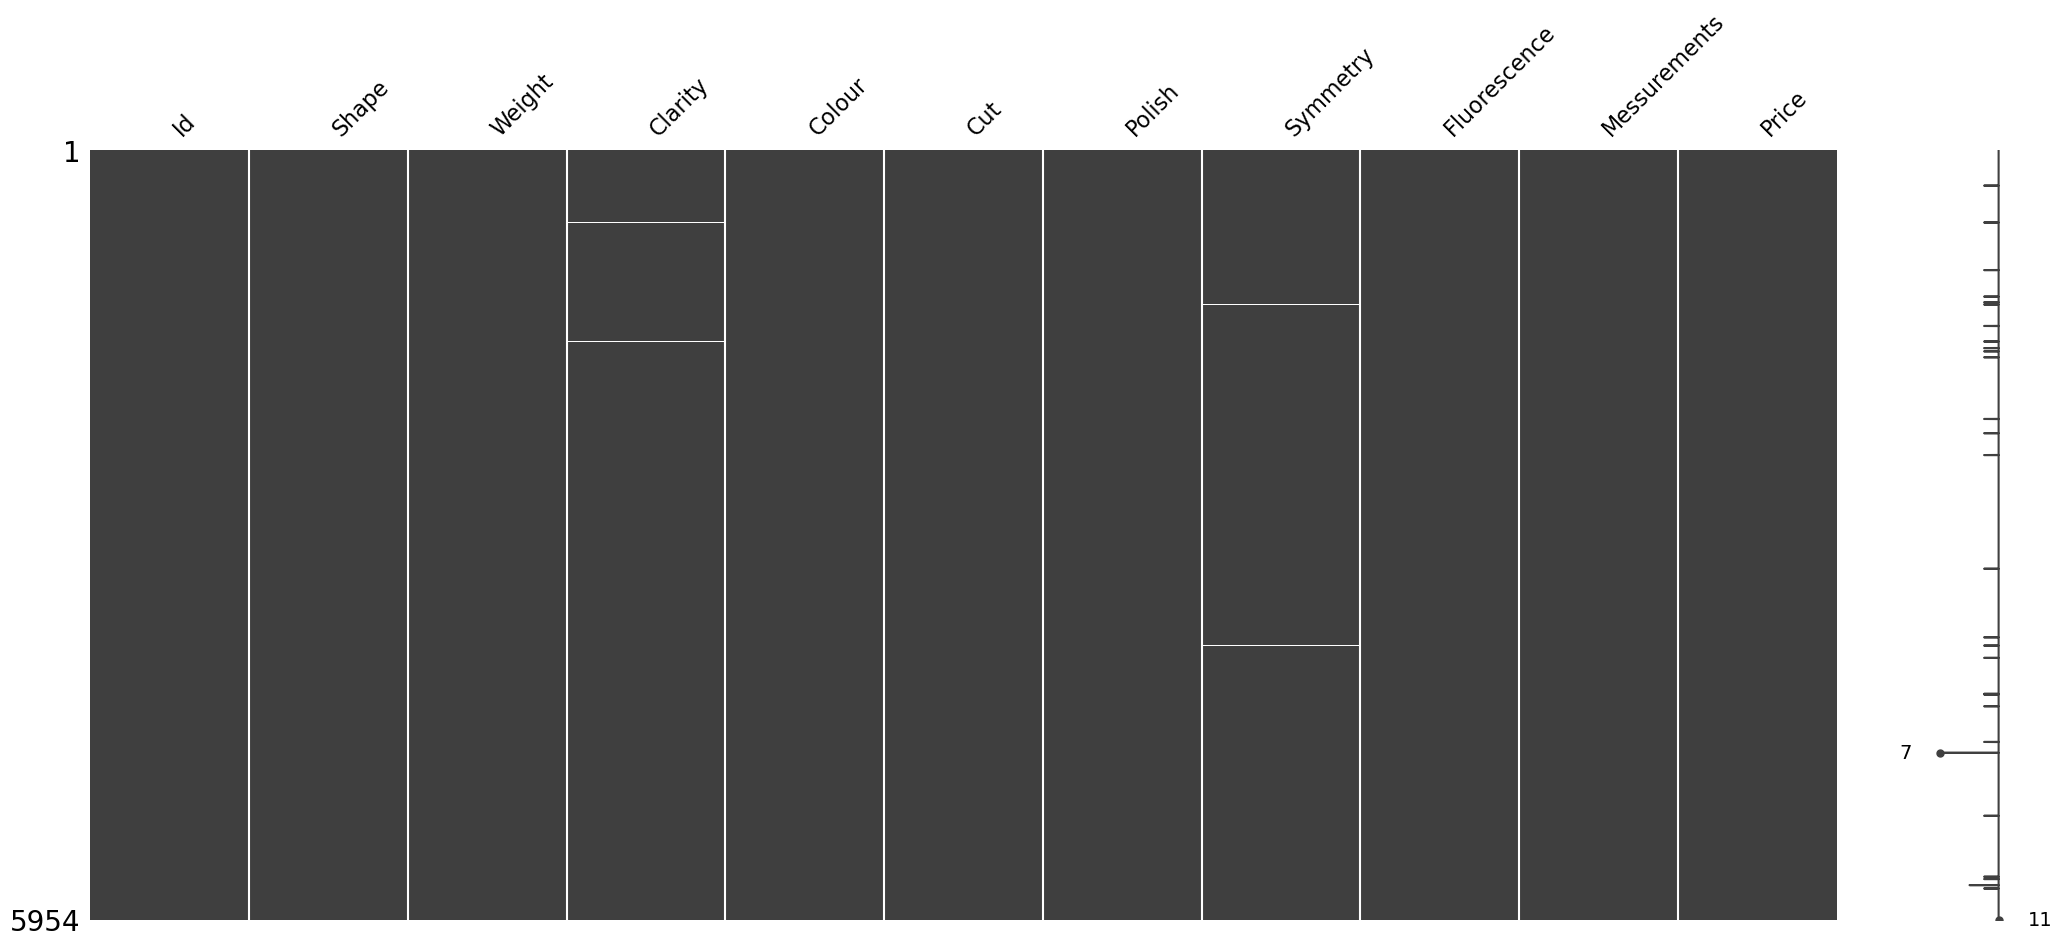

In [32]:
msno.matrix(Diamonds_prices)

In [33]:
Diamonds_prices['Clarity'] = Diamonds_prices['Clarity'].fillna(
    Diamonds_prices.groupby('Shape')['Clarity'].transform(lambda x: x.mode()[0])
)

Diamonds_prices['Cut'] = Diamonds_prices['Cut'].fillna(
    Diamonds_prices.groupby('Shape')['Cut'].transform(lambda x: x.mode()[0])
)

Diamonds_prices['Polish'] = Diamonds_prices['Polish'].fillna(
    Diamonds_prices.groupby('Shape')['Polish'].transform(lambda x: x.mode()[0])
)

Diamonds_prices['Symmetry'] = Diamonds_prices['Symmetry'].fillna(
    Diamonds_prices.groupby('Shape')['Symmetry'].transform(lambda x: x.mode()[0])
)

Diamonds_prices['Fluorescence'] = Diamonds_prices['Fluorescence'].fillna(
    Diamonds_prices.groupby('Shape')['Fluorescence'].transform(lambda x: x.mode()[0])
)

Diamonds_prices.isnull().sum()


Id              0
Shape           0
Weight          0
Clarity         0
Colour          0
Cut             0
Polish          0
Symmetry        0
Fluorescence    0
Messurements    0
Price           0
dtype: int64

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Avoiding duplicates</h4>
</div>

In [35]:
duplicates = Diamonds_prices.duplicated()
Diamonds_prices[duplicates]

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
343,1779373,ROUND,0.42,VS1,I,EX,EX,EX,N,4.84-4.85×2.96,"1,532.59"
380,1787334,ROUND,0.42,VS1,I,EX,EX,EX,N,4.78-4.79×2.99,"1,538.37"
563,1768451,ROUND,0.41,VS2,F,EX,EX,EX,F,4.78-4.80×2.97,"1,526.48"
573,1799224,ROUND,0.50,SI1,E,GD,EX,VG,F,4.95-5.00×3.19,"2,112.65"
653,1763395,ROUND,0.50,SI2,E,VG,VG,VG,N,4.91-4.97×3.19,"1,990.18"
...,...,...,...,...,...,...,...,...,...,...,...
5919,1766886,EMERALD,0.30,VVS1,E,EX,VG,GD,N,4.44-3.33×2.15,"1,028.09"
5930,1797722,ROUND,0.50,VVS1,E,GD,EX,GD,M,4.97-5.01×3.23,"2,077.86"
5946,1654405,CUSHION,0.86,VVS2,FANCY,EX,EX,VG,F,5.43-5.30×3.56,"2,210.42"
5949,1770845,ROUND,0.46,SI1,H,EX,VG,VG,N,4.94-4.97×3.08,"1,532.20"


We can see that there are 333 duplicates in the dataset. We will drop them because they are not necessary and this way we can lighten the dataset.

In [37]:
Diamonds_prices = Diamonds_prices.drop_duplicates()

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Transforming features</h4>
</div>

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Messurements column</h4>
</div>

We can transform this column into 3 different columns: one for each dimension (x,y,z). After alot of exploration, I was able to identify the different formats in which the measurements were written. Here is an example:

In [41]:
Diamonds_prices[Diamonds_prices['Messurements'].str.contains('mm', regex=False)] .head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
275,Eco Diamond 436057436,OVAL,1.05,SI2,E,VG,VG,VG,N,7.94 – 5.76 x 3.64 mm,"2,156.90"
921,Eco Diamond 440020244,EMERALD,0.70,SI1,E,EX,EX,EX,N,5.74 – 4.24 x 2.80 mm,"1,279.40"
1194,Eco Diamond 425061019,OVAL,1.00,SI2,D,VG,VG,VG,N,7.36 – 5.54 x 3.53 mm,"2,141.10"
1556,Eco Diamond 414098415,EMERALD,0.71,SI2,D,VG,VG,VG,N,5.75 – 4.16 x 2.90 mm,"1,188.14"
1616,Eco Diamond 444074120,OVAL,0.90,SI2,D,EX,EX,VG,N,7.43 – 5.61 x 3.33 mm,"1,740.96"


In [42]:
Diamonds_prices[Diamonds_prices['Messurements'].str.contains('X', regex=False)] .head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Messurements,Price
163,Eco Diamond LGC10178,CUSHION,1.28,VS2,H,VG,GD,GD,N,6.55X6.33X4.02,"2,850.12"
768,Eco Diamond LGC10201,CUSHION,1.71,VS2,J,VG,VG,VG,N,7.05X7.01X4.40,"3,683.56"
806,Eco Diamond LG200871,CUSHION,1.52,SI1,F,EX,EX,EX,N,6.69X6.63X4.42,"4,854.82"
839,Eco Diamond LGC10383,CUSHION,1.59,VS1,I,GD,VG,VG,N,6.99X6.58X4.16,"3,909.51"
1117,Eco Diamond LGC10129,CUSHION,1.58,VS1,I,VG,VG,VG,N,7.06X6.74X4.25,"4,132.68"


I proceeded by elimination until I identified all the formats. I noticed that ×, x, and X are different characters, as well as - and – (hyphen and en dash). Now we can apply the necessary tranformations. First we drop the "mm" string when present then we separate into columns.

In [44]:
Diamonds_prices['Messurements'] = Diamonds_prices['Messurements'].str.replace('mm', '').str.strip()

In [45]:
# Function to parse the 'Measurements' column
def parse_measurements(measurement):
    """this function allows us to separate the measurments into 3 dimensions. 
    Its tests in which format the measurment is written then splits it accordingly."""
    if '×' in measurement and '-' in measurement: 
        # Format: 4.91-4.97×3.19
        xy, z = measurement.split('×')
        x, y = xy.split('-')
        return float(x), float(y), float(z)
    elif 'x' in measurement and '-' in measurement:
        # Format: 4.91-4.97×3.19
        xy, z = measurement.split('x')
        x, y = xy.split('-')
        return float(x), float(y), float(z)
    elif 'X' in measurement and '-' in measurement:
        # Format: 5.62-5.47X3.71
        xy, z = measurement.split('X')
        x, y = xy.split('-')
        return float(x), float(y), float(z)
    elif 'X' in measurement:
        # Format: 5.62X5.47X3.71
        x, y, z = measurement.split('X')
        return float(x), float(y), float(z)

    elif 'x' in measurement and '–' in measurement:
        # Format: 5.62X5.47X3.71
        xy, z = measurement.split('x')
        x, y = xy.split('–')
        return float(x), float(y), float(z)
        
    else:
        # Handle unexpected format
        return np.nan, np.nan, np.nan
        
Diamonds_prices[['x', 'y', 'z']] = Diamonds_prices['Messurements'].apply(lambda m: pd.Series(parse_measurements(m)))

#we no longer need the messurments column
Diamonds_prices.drop(["Messurements"], axis=1, inplace=True)

In [46]:
Diamonds_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5621 entries, 0 to 5953
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            5621 non-null   object 
 1   Shape         5621 non-null   object 
 2   Weight        5621 non-null   float64
 3   Clarity       5621 non-null   object 
 4   Colour        5621 non-null   object 
 5   Cut           5621 non-null   object 
 6   Polish        5621 non-null   object 
 7   Symmetry      5621 non-null   object 
 8   Fluorescence  5621 non-null   object 
 9   Price         5621 non-null   object 
 10  x             5621 non-null   float64
 11  y             5621 non-null   float64
 12  z             5621 non-null   float64
dtypes: float64(4), object(9)
memory usage: 614.8+ KB


<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">x, y, z columns</h4>
</div>

We must verify if there missing values. We must also make sure that the data is coherent and no dimension is equals to 0 because that would be impossible.

In [49]:
#Making sure we don't have any missing values in x,y or z
Diamonds_prices.isnull().sum()

Id              0
Shape           0
Weight          0
Clarity         0
Colour          0
Cut             0
Polish          0
Symmetry        0
Fluorescence    0
Price           0
x               0
y               0
z               0
dtype: int64

In [50]:
# Check if the values in columns 'x', 'y', and 'z' are equal to 0
Diamonds_prices[(Diamonds_prices['x'] == 0) | (Diamonds_prices['y'] == 0) | (Diamonds_prices['z'] == 0)]


,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,x,y,z


<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Price column</h4>
</div>

We must convert the price column into a float type. the price is writen in this format : thousands,hunders.decimals

We must eliminate the ',' and convert to float.

In [53]:
Diamonds_prices['Price'] = Diamonds_prices['Price'].str.replace(',', '').astype(float)

Diamonds_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5621 entries, 0 to 5953
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            5621 non-null   object 
 1   Shape         5621 non-null   object 
 2   Weight        5621 non-null   float64
 3   Clarity       5621 non-null   object 
 4   Colour        5621 non-null   object 
 5   Cut           5621 non-null   object 
 6   Polish        5621 non-null   object 
 7   Symmetry      5621 non-null   object 
 8   Fluorescence  5621 non-null   object 
 9   Price         5621 non-null   float64
 10  x             5621 non-null   float64
 11  y             5621 non-null   float64
 12  z             5621 non-null   float64
dtypes: float64(5), object(8)
memory usage: 614.8+ KB


In [54]:
Diamonds_prices

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,x,y,z
0,1763395,ROUND,0.50,SI2,E,VG,VG,VG,N,1990.18,4.91,4.97,3.19
1,1735493,ROUND,0.50,SI2,F,EX,VG,VG,N,2040.00,5.13,5.16,3.13
2,1769508,EMERALD,0.40,VS1,F,EX,VG,GD,N,1290.55,5.36,3.46,2.21
3,1669926,ROUND,0.50,VVS2,J,EX,EX,EX,N,2109.57,5.05,5.08,3.16
4,1788940,CUSHION,0.80,SI2,E,EX,EX,EX,N,2594.54,5.31,5.14,3.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,1782992,OVAL,0.50,SI1,F,EX,EX,GD,N,1624.24,6.24,4.65,2.73
5948,1793407,PRINCESS,0.50,SI1,E,VG,EX,VG,N,1646.18,4.33,4.26,3.17
5950,1657065,ROUND,0.50,VS1,G,EX,EX,VG,F,2527.87,5.04,5.10,3.16
5952,1791216,OVAL,0.31,VS2,D,EX,EX,VG,N,1103.47,5.22,3.88,2.33


<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Treating Outliers</h4>
</div>

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Price outliers</h4>
</div>

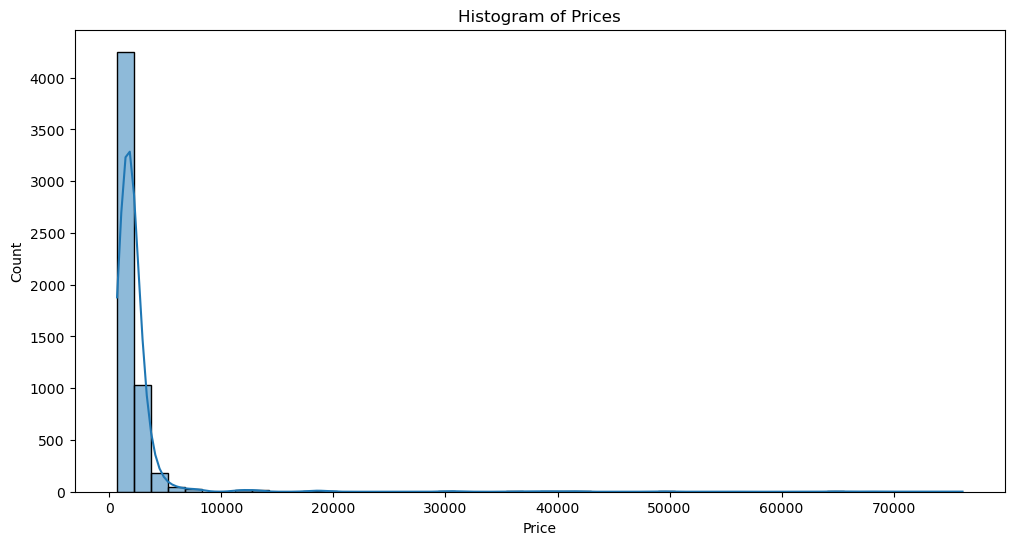

In [57]:
plt.figure(figsize=(12, 6))
sns.histplot(Diamonds_prices['Price'], bins=50, kde=True)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.show()

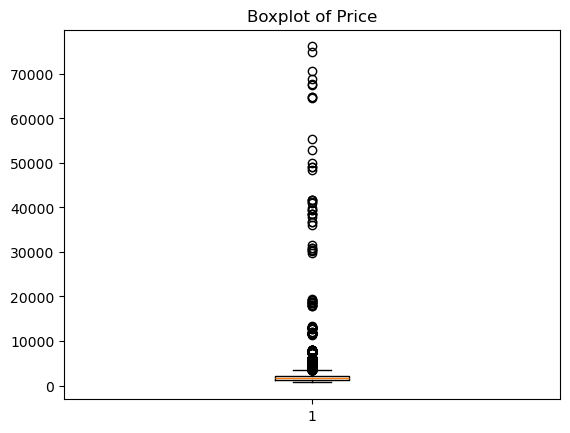

In [58]:
# Create a boxplot for 'Price'
plt.boxplot(Diamonds_prices['Price'])
plt.title('Boxplot of Price')
plt.show()


In [59]:
len(Diamonds_prices[Diamonds_prices['Price']>10000])

82

We have identified around 82 outliers in the price region. We could treat them, expecially sine there are ver extreme values like (70k dollars). However, seeing as diamonds can reach such high prices let's try to understand if these values are legitimate. 

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Weight outliers</h4>
</div>

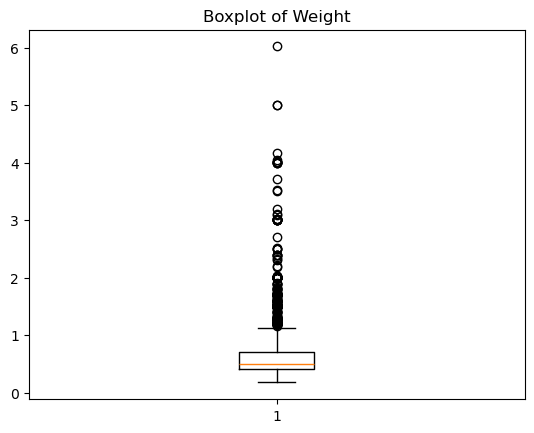

In [62]:
plt.boxplot(Diamonds_prices['Weight'])
plt.title('Boxplot of Weight')
plt.show()

In [63]:
len(Diamonds_prices[(Diamonds_prices['Weight'] > 2) & (Diamonds_prices['Price'] > 10000)])

49

As we can see, there is are also outliers in the weight region. these explain the price outliers because the more a diamond weight the higher the price. This combined with other possible qualities can explain the extremly high prices. Let's take a deeper look:

In [65]:
Diamonds_prices[Diamonds_prices['Price'] > 10000]

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,x,y,z
39,211003-1076,CUSHION,1.32,IF,D,EX,EX,EX,VS,11502.51,6.42,6.03,4.04
127,211096-235,CUSHION,2.00,VS1,K,EX,EX,VG,N,11775.25,7.18,7.06,4.80
221,211007-21,CUSHION,2.00,VS1,FANCY,EX,EX,VG,M,11586.96,7.12,6.84,4.63
298,201239-80,CUSHION,2.00,SI1,I,GD,EX,VG,N,12696.18,7.09,6.76,4.71
308,210035-119,CUSHION,2.01,SI2,I,VG,VG,VG,N,11445.17,7.36,6.78,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5517,201199-96,CUSHION,2.00,IF,D,EX,EX,VG,ST,29832.43,8.15,6.53,4.42
5676,210587-99,CUSHION,3.01,VS2,FANCY,EX,EX,EX,M,41745.97,7.87,7.67,5.30
5756,210361-167,CUSHION,2.40,VVS2,F,VG,EX,EX,N,36787.55,7.58,7.22,5.07
5792,200774-47,CUSHION,1.70,VS1,F,EX,EX,VG,M,13262.90,7.38,6.90,4.29


In [66]:
Diamonds_prices[Diamonds_prices['Price'] > 70000]

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,x,y,z
971,NY180424-54,CUSHION,4.00,VS2,H,EX,EX,EX,N,74875.06,9.21,8.61,5.84
3589,201196-1,CUSHION,4.02,VS2,D,VG,EX,VG,M,76147.68,9.63,8.38,5.83
5888,200705-16,CUSHION,4.16,VVS1,FANCY,EX,EX,VG,N,70749.53,9.93,8.33,5.67


Let's determine the exact number of outliers in the price section we will consider using the Z-score.

In [68]:
# first we get the Z-score for the price
Diamonds_prices['Price_zscore'] = (Diamonds_prices['Price'] - Diamonds_prices['Price'].mean()) / Diamonds_prices['Price'].std()

# then we get the outliers (Z-score > 3 or < -3)
outliers = Diamonds_prices[np.abs(Diamonds_prices['Price_zscore']) > 3]

print("Number of outliers:", outliers.shape[0])

Number of outliers: 52


Those two last tables allow us to see that these high prices are well justified. Most of the features are of high quality like excellent (EX). Among the most expensive diamonds worth more that 70k, we can see high weights, excellent features and a FANCY colour (which is the best). As these values are **legitimate** , we cannot "change" the prices because the outliers represent valid but rare high-value items. 

The number of outliers is 52, which represents 0.8% of the dataset. Since this is insignificant we will simply delete them from the dataset.

In [70]:
# Remove outliers from the dataset
Diamonds_prices = Diamonds_prices[np.abs(Diamonds_prices['Price_zscore']) <= 3]

# Drop the 'Price_zscore' column as it's no longer needed
Diamonds_prices.drop(columns=['Price_zscore'], inplace=True)

Diamonds_prices


,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,x,y,z
0,1763395,ROUND,0.50,SI2,E,VG,VG,VG,N,1990.18,4.91,4.97,3.19
1,1735493,ROUND,0.50,SI2,F,EX,VG,VG,N,2040.00,5.13,5.16,3.13
2,1769508,EMERALD,0.40,VS1,F,EX,VG,GD,N,1290.55,5.36,3.46,2.21
3,1669926,ROUND,0.50,VVS2,J,EX,EX,EX,N,2109.57,5.05,5.08,3.16
4,1788940,CUSHION,0.80,SI2,E,EX,EX,EX,N,2594.54,5.31,5.14,3.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5947,1782992,OVAL,0.50,SI1,F,EX,EX,GD,N,1624.24,6.24,4.65,2.73
5948,1793407,PRINCESS,0.50,SI1,E,VG,EX,VG,N,1646.18,4.33,4.26,3.17
5950,1657065,ROUND,0.50,VS1,G,EX,EX,VG,F,2527.87,5.04,5.10,3.16
5952,1791216,OVAL,0.31,VS2,D,EX,EX,VG,N,1103.47,5.22,3.88,2.33


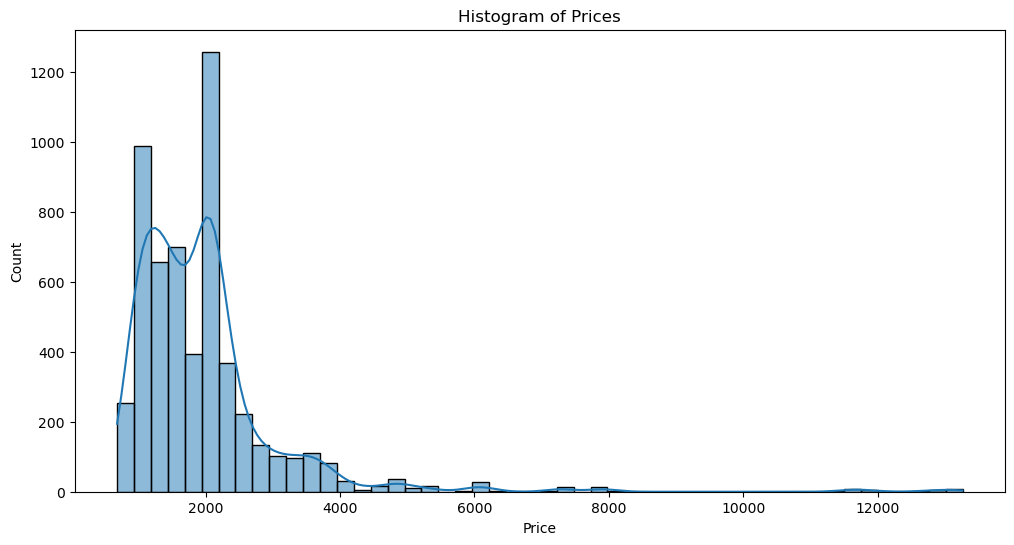

In [71]:
plt.figure(figsize=(12, 6))
sns.histplot(Diamonds_prices['Price'], bins=50, kde=True)
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.show()

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Additional feature engineering (stage 3 idea )</h4>
</div>

In stages 1 and 2 our study had allowed to demonstrate the poor performance of linear models on non-linear data. Lasso and Ridge regression, like linear regression, are all linear models and inherently assume a linear relationship between the independent variables and the target. Because of this, they do not perform well on non-linear data without additional preprocessing or feature engineering.
I will attempt to perform more feature engineering to try and improve these models. 

This can also help us reduce the numbers of features and ease the feature selection process for concerned models.

<div style="background-color:#B2E6D4; padding:5px; border-radius:.0px; text-align:center; width:50%; margin:0;">
    <h4 style="color:#228B22; font-size:14px; margin:0;">Adding volume feature</h4>
</div>

By transforming x,y,z into a volume feature, i am attempting to create a linear relationship between the weight and the dimensions.

In [73]:
Diamonds_prices['Volume'] = Diamonds_prices['x'] * Diamonds_prices['y'] * Diamonds_prices['z']

Diamonds_prices = Diamonds_prices.drop(['x', 'y', 'z'], axis=1)

Diamonds_prices.head()

,Id,Shape,Weight,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence,Price,Volume
0,1763395,ROUND,0.5,SI2,E,VG,VG,VG,N,1990.18,77.844613
1,1735493,ROUND,0.5,SI2,F,EX,VG,VG,N,2040.00,82.853604
2,1769508,EMERALD,0.4,VS1,F,EX,VG,GD,N,1290.55,40.985776
3,1669926,ROUND,0.5,VVS2,J,EX,EX,EX,N,2109.57,81.066640
4,1788940,CUSHION,0.8,SI2,E,EX,EX,EX,N,2594.54,94.981032


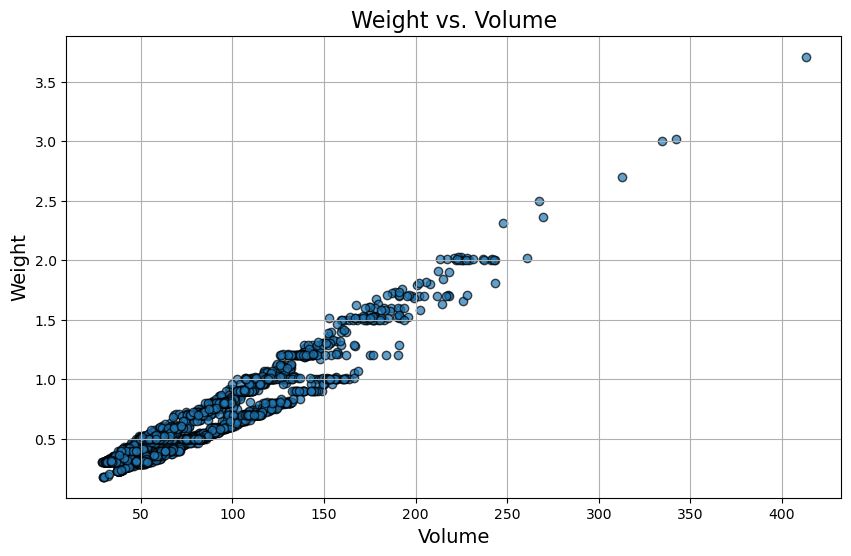

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(Diamonds_prices['Volume'], Diamonds_prices['Weight'], alpha=0.7, edgecolors='k')
plt.title('Weight vs. Volume', fontsize=16)
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Weight', fontsize=14)
plt.grid(True)
plt.show()

We can see a clear linear relationship between the weight and the volume.

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Diamonds Dataset for image-based assesment</h2>
</div>

We aim to try to asses 4 qualities from the images : Shape, Colour, Clarity and Fluorescence. Which is why we only need these columns.

In [91]:
Diamonds_images = Diamonds_prices.drop(['Weight', 'Cut','Polish','Symmetry','Price','Volume'], axis = 1).copy()
Diamonds_images

,Id,Shape,Clarity,Colour,Fluorescence
0,1763395,ROUND,SI2,E,N
1,1735493,ROUND,SI2,F,N
2,1769508,EMERALD,VS1,F,N
3,1669926,ROUND,VVS2,J,N
4,1788940,CUSHION,SI2,E,N
...,...,...,...,...,...
5947,1782992,OVAL,SI1,F,N
5948,1793407,PRINCESS,SI1,E,N
5950,1657065,ROUND,VS1,G,F
5952,1791216,OVAL,VS2,D,N


We need to associate the images to their correct data (the corrrect data). For that we will use the Id. The image are named with the diamond's corresponding Id. All we need to do is map the correct image url into the correct row by comparing Ids and image names. Some images are missing so we will delete these columns

In [94]:
import os

# List of image folder paths for different shapes
image_folders = ['./Images/cushion', './Images/emerald', './Images/heart', './Images/oval', './Images/princess', './Images/round']

def find_image_url(image_id):
    """this function helps us find the image url in the correct folder"""
    for folder in image_folders:
        if f"{image_id}.jpg" in os.listdir(folder):
            return f"{folder}/{image_id}.jpg"
    return None

# Apply the function 
Diamonds_images['Image_URL'] = Diamonds_images['Id'].apply(find_image_url)

# delete rows with no image URL
Diamonds_images = Diamonds_images[Diamonds_images['Image_URL'].notnull()]

Diamonds_images


,Id,Shape,Clarity,Colour,Fluorescence,Image_URL
0,1763395,ROUND,SI2,E,N,./Images/round/1763395.jpg
2,1769508,EMERALD,VS1,F,N,./Images/emerald/1769508.jpg
5,1655964,ROUND,SI1,E,N,./Images/round/1655964.jpg
6,1799816,EMERALD,VVS2,F,N,./Images/emerald/1799816.jpg
8,1758652,ROUND,VS2,F,N,./Images/round/1758652.jpg
...,...,...,...,...,...,...
5947,1782992,OVAL,SI1,F,N,./Images/oval/1782992.jpg
5948,1793407,PRINCESS,SI1,E,N,./Images/princess/1793407.jpg
5950,1657065,ROUND,VS1,G,F,./Images/round/1657065.jpg
5952,1791216,OVAL,VS2,D,N,./Images/oval/1791216.jpg


<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Data Analysis: Price</h2>
</div>

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">General look</h4>
</div>

Let's look into the basic statistical data.

In [98]:
Diamonds_prices.describe()

,Weight,Price,Volume
count,5569.000000,5569.000000,5569.000000
mean,0.591085,1968.894446,79.075618
std,0.283243,1210.839264,32.585469
min,0.180000,683.220000,28.637742
25%,0.410000,1272.940000,56.127625
50%,0.500000,1788.210000,78.466752
75%,0.700000,2142.720000,92.215692
max,3.710000,13262.900000,413.176680


It might be more interesting to look into the prices' statistics per shape.

In [100]:
# Group by 'Shape' and get statistics for Price
diamonds_prices_description = Diamonds_prices.groupby('Shape').describe()
diamonds_prices_description['Price']

,count,mean,std,min,25%,50%,75%,max
Shape,,,,,,,,
CUSHION,1610.0,2900.728335,1821.062540,683.22,1638.8950,2563.250,3432.5625,13262.90
EMERALD,550.0,1202.082109,179.384710,901.80,1058.9050,1174.675,1289.5900,1701.95
HEART,345.0,999.914754,107.985571,781.64,902.2600,1022.520,1096.5200,1143.64
OVAL,678.0,1657.793260,390.316015,764.56,1320.5175,1735.710,1920.7125,2374.47
PRINCESS,624.0,1406.131522,338.151499,746.81,1069.0350,1440.000,1705.0500,1954.96
ROUND,1762.0,1865.536266,415.562704,826.78,1528.7050,2041.080,2089.6100,2568.80


We can make critical conclusion based on these data because a diamonds price depends on many other features which can shift the prices drastically. let's take a look at each feature

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Shape</h4>
</div>

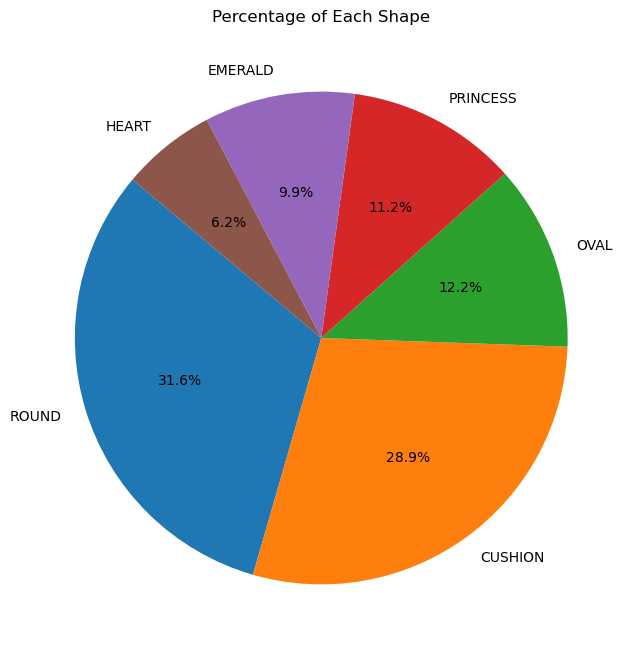

In [103]:
# Create a pie chart to show the percentage of each shape in the dataset
shape_counts = Diamonds_prices['Shape'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(shape_counts, labels=shape_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Shape')
plt.show()


Our data is not evenly separated into shapes. Our models may be able to predict prices for specifique shapes better that other. Let's take a look into what the shapes look like.

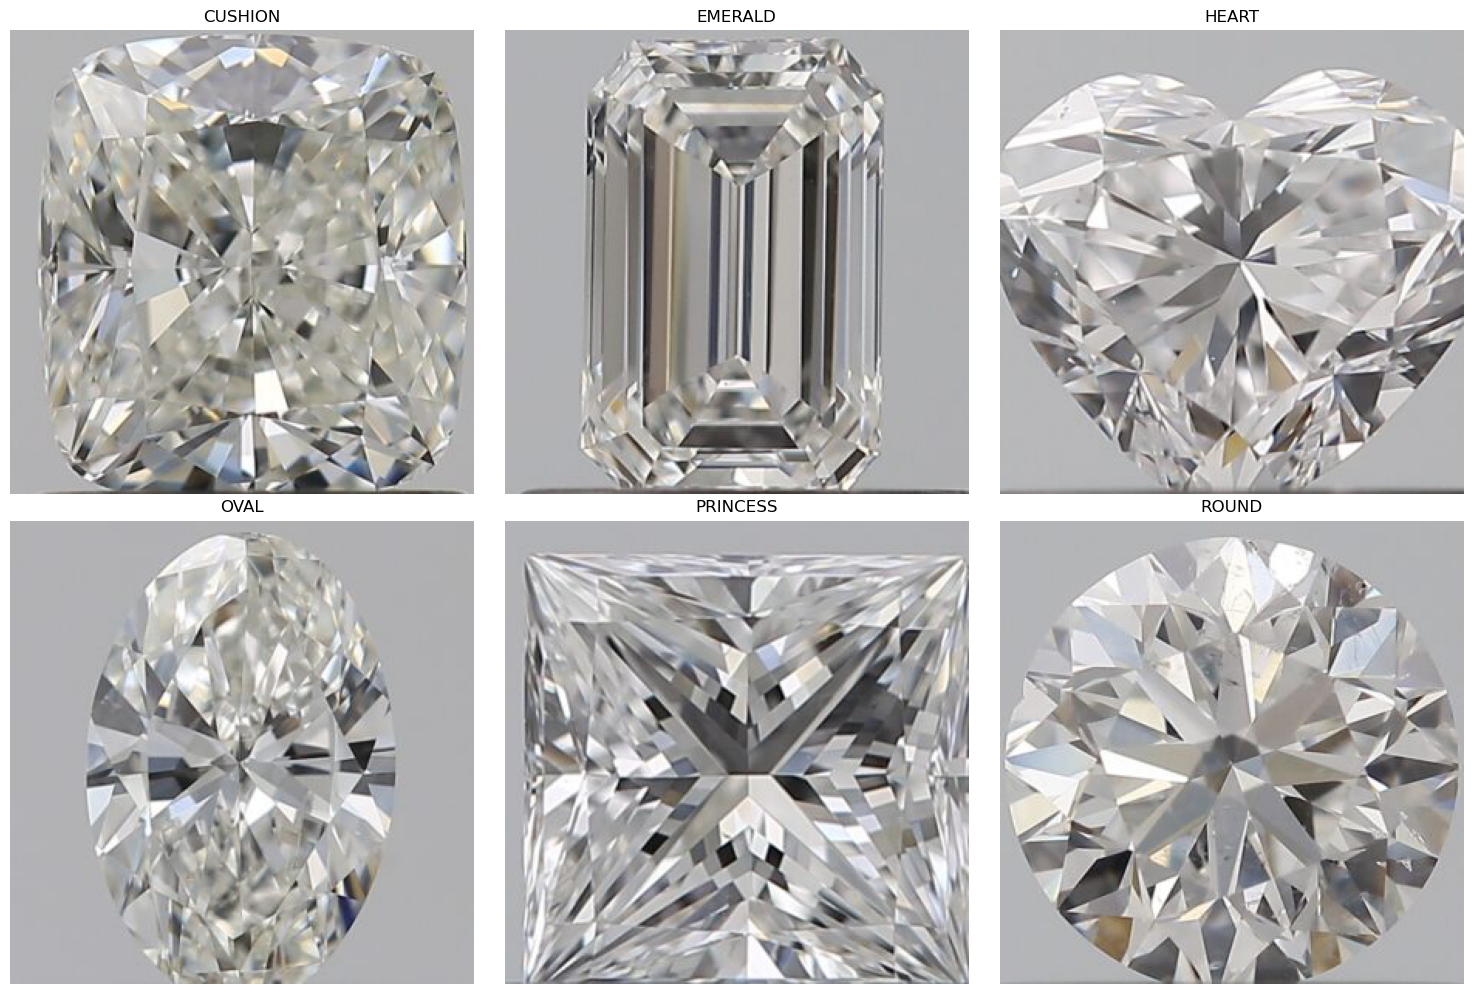

In [105]:
# Get one sample row for each unique shape
sample_images = Diamonds_images.groupby('Shape').first().reset_index()

plt.figure(figsize=(15, 10))
for i, row in enumerate(sample_images.itertuples(), start=1):
    plt.subplot(2, 3, i)  # Adjust grid size based on the number of shapes
    img = mpimg.imread(row.Image_URL)
    plt.imshow(img)
    plt.title(row.Shape)
    plt.axis('off')

plt.tight_layout()
plt.show()


<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Weight</h4>
</div>

The weight of diamonds is measured in carats. It’s important to note that carat refers to the weight of the stone, not its size. 

**The weight of a diamond significantly impacts its price**. Because larger stones are rarer, a single 2-carat diamond will generally be more expensive than the combined cost of two 1-carat diamonds of the same quality. This rarity contributes to the exponential increase in value as the carat weight increases.

Let's visualize these claims to make sure they are coherent with our data. We will take a look into how the price varies as the weights  increases and check the price per carat.


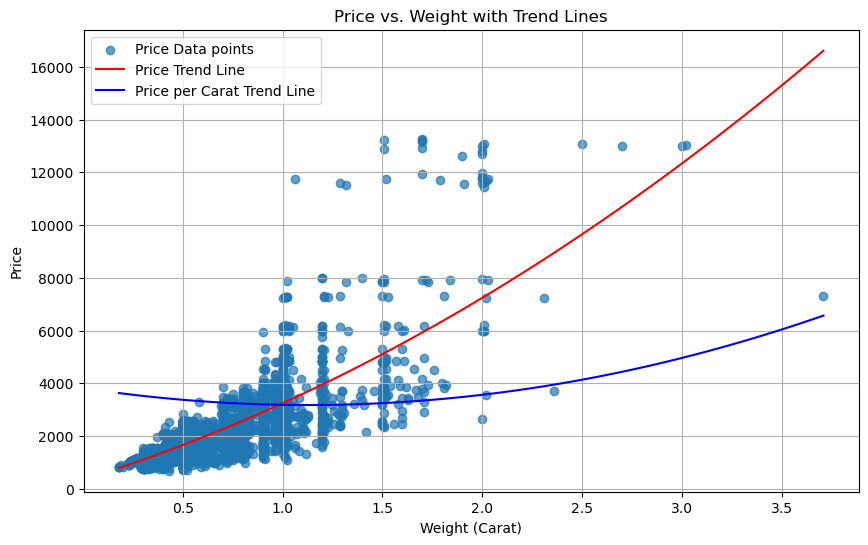

In [108]:
# Calculate Price per Carat
Diamonds_prices['Price_per_Carat'] = Diamonds_prices['Price'] / Diamonds_prices['Weight']

# Scatter plot of Price vs. Weight
plt.figure(figsize=(10, 6))
plt.scatter(Diamonds_prices['Weight'], Diamonds_prices['Price'], alpha=0.7, label='Price Data points')

# Fit a polynomial regression for Price vs. Weight to get an idea of how the price actually varies
p_price = Polynomial.fit(Diamonds_prices['Weight'].dropna(), Diamonds_prices['Price'].dropna(), deg=2)

# Generate a smooth curve for Price trend line
x = np.linspace(Diamonds_prices['Weight'].min(), Diamonds_prices['Weight'].max(), 100)
y_price = p_price(x)
plt.plot(x, y_price, color='red', label='Price Trend Line')

# Fit a polynomial regression for Price per Carat to see if its linear or not
p_price_per_carat = Polynomial.fit(Diamonds_prices['Weight'].dropna(), Diamonds_prices['Price_per_Carat'].dropna(), deg=2)

# Generate a smooth curve for Price per Carat trend line
y_price_per_carat = p_price_per_carat(x)
plt.plot(x, y_price_per_carat, color='blue', label='Price per Carat Trend Line')

plt.title('Price vs. Weight with Trend Lines')
plt.xlabel('Weight (Carat)')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

Diamonds_prices.drop(['Price_per_Carat'], axis =1, inplace=True) #no need for it in our dataset


This graph clearly demonstrates the relationship between weight and price, highlighting their correlation. It also supports the previous claims that both the price and the price per carat increase exponentially with the weight.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Clarity</h4>
</div>

Diamond clarity refers to the absence of inclusions and blemishes. An inclusion is an internal imperfection within a diamond, such as cracks or tiny minerals inside it. Blemishes, on the other hand, are imperfections that occur due to the cutting and polishing process like scratches.

The clarity labels are as follows: I1, I2, I3 (Included), SI1, SI2 (Slightly Included), VS1, VS2 (Very Slightly Included), VVS1, VVS2 (Very, Very Slightly Included), IF (Internally Flawless), FL (Flawless). 

In [112]:
Diamonds_prices['Clarity'].unique()

array(['SI2', 'VS1', 'VVS2', 'SI1', 'VS2', 'VVS1', 'IF', 'I1', 'I2', 'I3'],
      dtype=object)

Let's see how price varies

<Axes: xlabel='Clarity', ylabel='Price'>

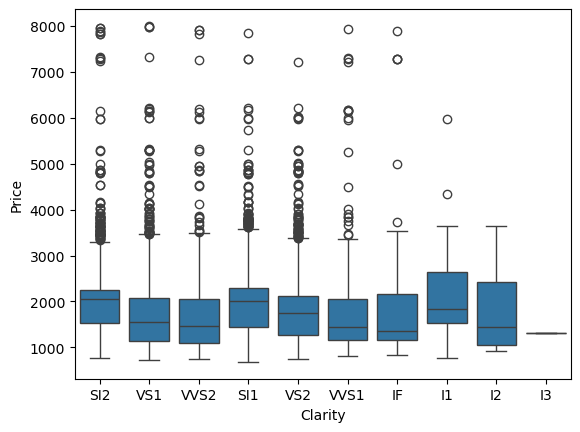

In [114]:
sns.boxplot(x='Clarity', y='Price', data=Diamonds_prices[Diamonds_prices['Price']<10000])

In this case, we can't clearly see that a higher clarity grade results in a better price. However, there could be an explanation for this observation.

<Axes: xlabel='Clarity', ylabel='Weight'>

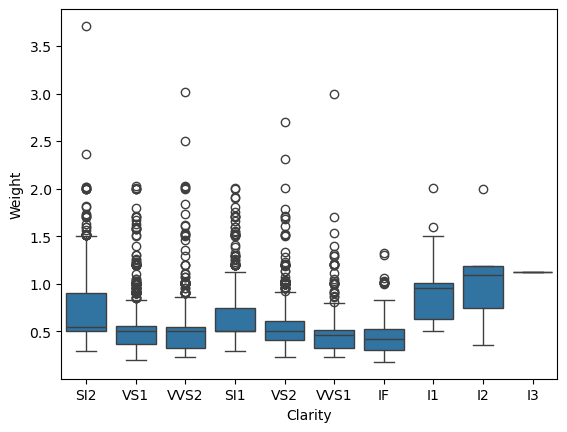

In [116]:
sns.boxplot(x='Clarity', y='Weight', data=Diamonds_prices[Diamonds_prices['Weight']<5])

The weight distribution could explain the relationship between prices and clarity. Some diamonds with 'lower quality' clarity grades have a high weight, which could drive their prices higher and shift the overall box plot. This could similarly be rlated to the other feateures. Again, the non-linear relationship between the features akes price prediction hard.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Colour</h4>
</div>

The color of a diamond refers to its tone and saturation, or the depth of color within the stone. Diamond color can range from completely colorless to a yellow or faint brownish hue. Colorless diamonds are rarer and more valuable, as they appear whiter and brighter. The "color" ranges from D to Z, D being colorless and Z being light colored. Then outside of this scale we have the Fancy diamonds which have unique colors and are often more expensive and valuable than colorless diamonds, depending on the rarity and demand for specific colors like pink, blue, or green.

<Axes: xlabel='Colour', ylabel='Price'>

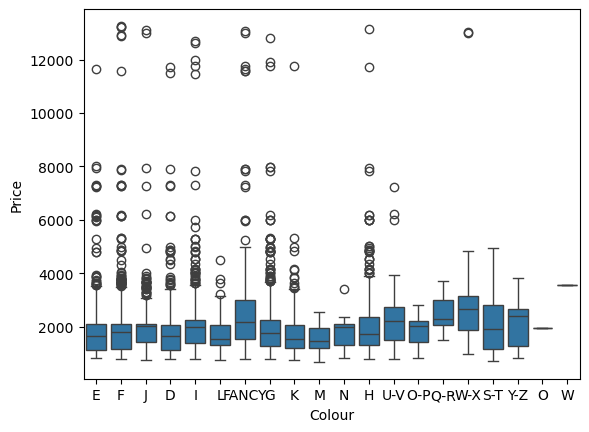

In [120]:
sns.boxplot(x='Colour', y='Price' , data=Diamonds_prices)


We can clearly see from the fancy boxplot that the average price of a fancy diamonds is higher than others. 

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Cut</h4>
</div>

Although the Carat Weight of a Diamond has the Strongest Effect on Prices, the Cut can still Drastically Increase or Decrease its value.
With a Higher Cut Quality, the Diamond’s Cost per Carat Increases.

The labels are self explanatory: poor, fair, good, ver good and excellent.

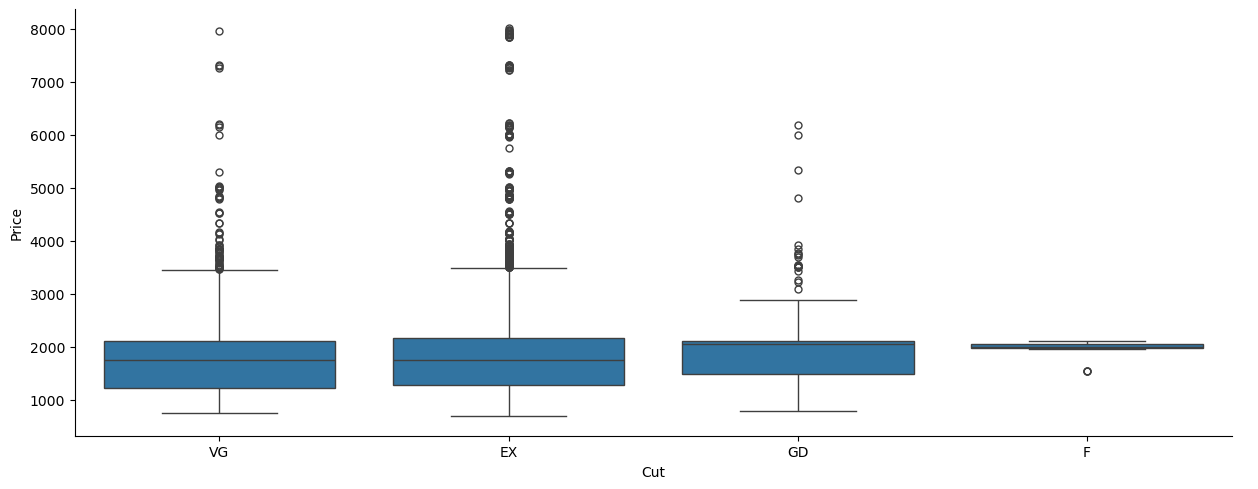

In [124]:
sns.catplot(x='Cut', y='Price', data=Diamonds_prices[Diamonds_prices['Price']<10000], kind='box' ,aspect=2.5 )


The cat plot shows the expected behavior (Q3 shows it best): as the quality of the cut improves, the prices tend to be higher.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Polish</h4>
</div>

Diamond polish refers to the quality of the surface finish of a diamond after it has been cut. It affects how well light passes through the diamond, impacting its brilliance and sparkle. The labels are also self explanatory

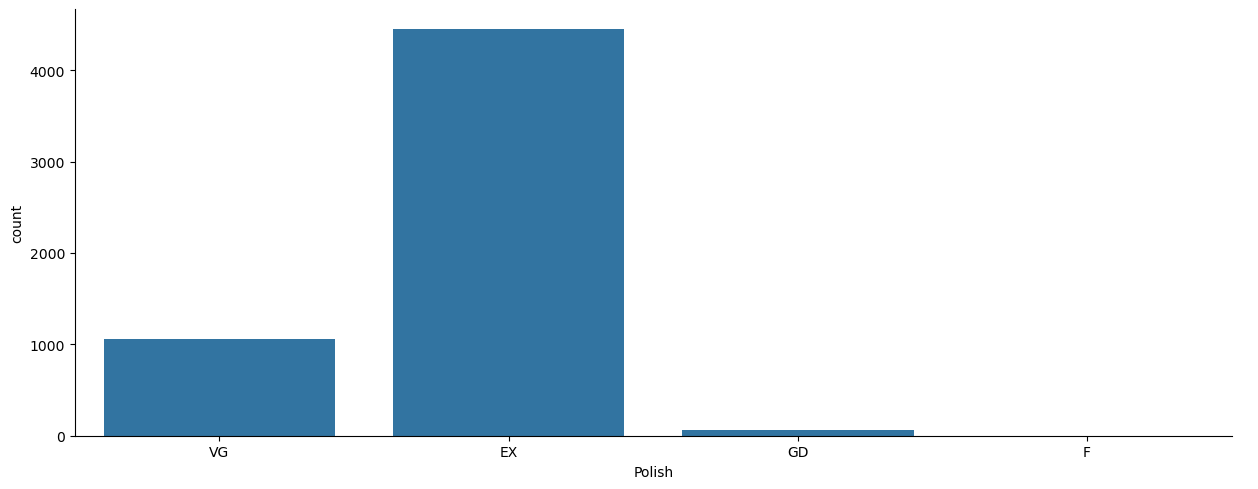

In [128]:
sns.catplot(x='Polish', data=Diamonds_prices , kind='count',aspect=2.5 )


There is a very low count of diamonds with a 'Fair' and 'Good' Polish. This could potentially lead to a model struggling with predictions for diamonds of these polish quality.

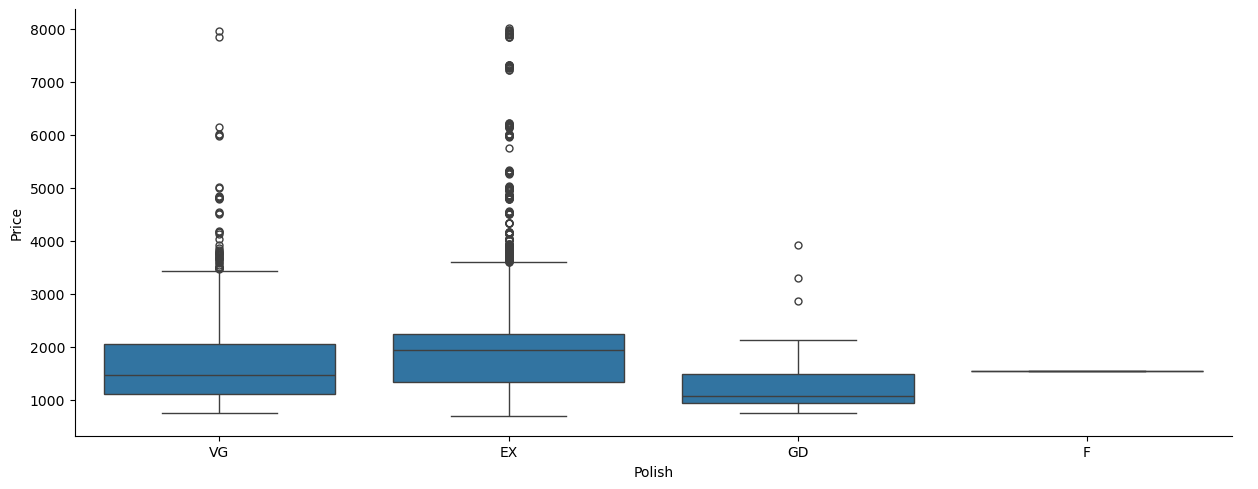

In [130]:
sns.catplot(x='Polish', y='Price', data=Diamonds_prices[Diamonds_prices['Price']<10000], kind='box' ,aspect=2.5 )

The price follows the expected behavior according to polish quality, except for diamonds with a 'Fair' polish. However, as noted earlier, other factors could have influenced these price variations.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Symmetry</h4>
</div>

Diamond Symmetry refers to the alignment and proportion of a diamond’s facets. Good symmetry ensures that light reflects evenly, contributing to the diamond’s brilliance and sparkle. Poor symmetry can cause light to be misdirected, reducing the diamond’s visual appeal.

The symmetry data is evenly distributed, except for the 'Fair' category, which is barely represented. This may cause the model to struggle when predicting diamonds with 'Fair' symmetry.

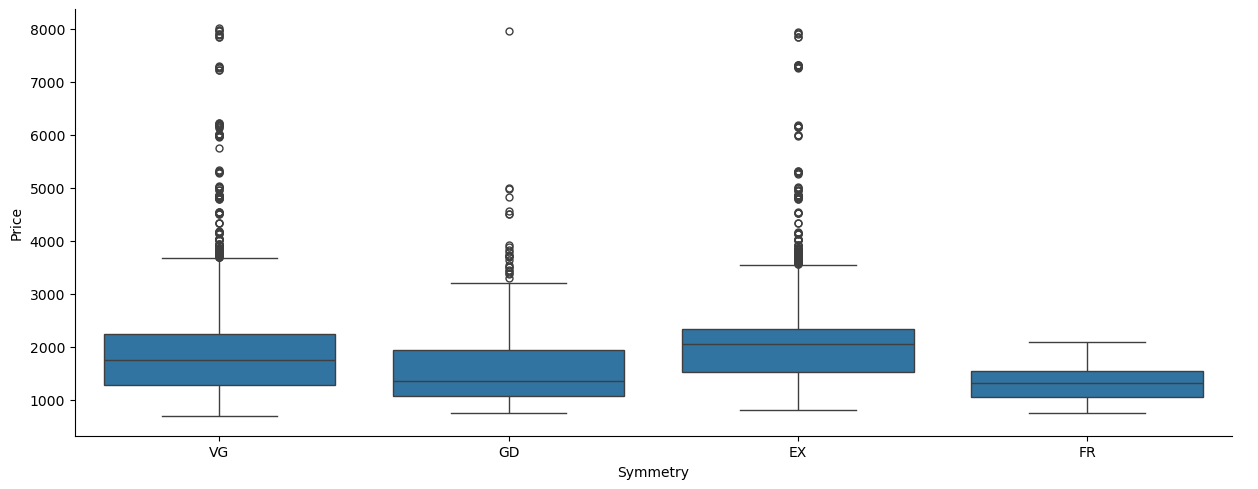

In [135]:
sns.catplot(x='Symmetry', y='Price', data=Diamonds_prices[Diamonds_prices['Price']<10000], kind='box' ,aspect=2.5 )

The price follows the expected trend according to symmetry.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Fluorescence</h4>
</div>

Diamond Fluorescence is the glow a diamond emits when exposed to ultraviolet (UV) light. It can range from none to strong and may affect the diamond's appearance in certain lighting. In some cases, fluorescence can make a diamond appear hazy, while in others, it may enhance the color. These are the comon labels: None (N), Faint (F), Medium (M), Strong (ST), Very Strong (VS), Slight (SL), Very Slight (VSL).

It is hard to define price according to fluorescence because sometimes it helps improve the aspect of the diamond and sometimes the opposite

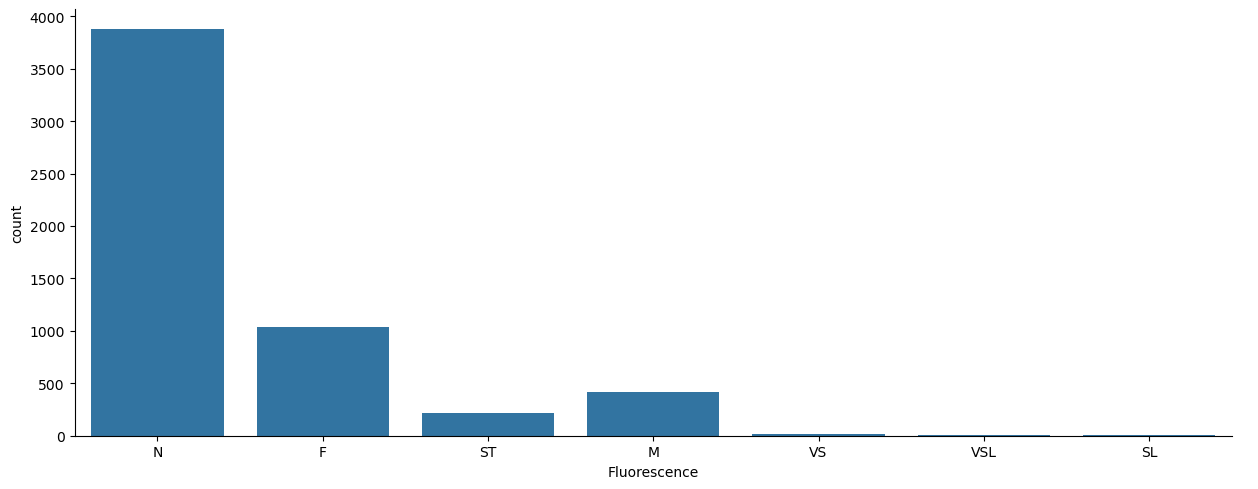

In [139]:
sns.catplot(x='Fluorescence', data=Diamonds_prices , kind='count',aspect=2.5 )


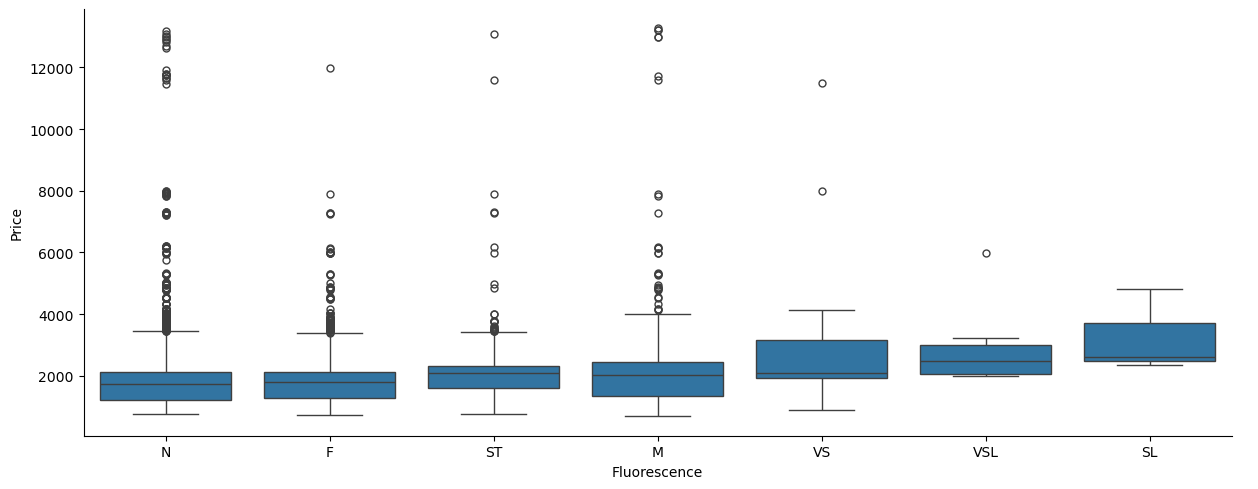

In [140]:
sns.catplot(x='Fluorescence', y='Price', data=Diamonds_prices, kind='box' ,aspect=2.5 )

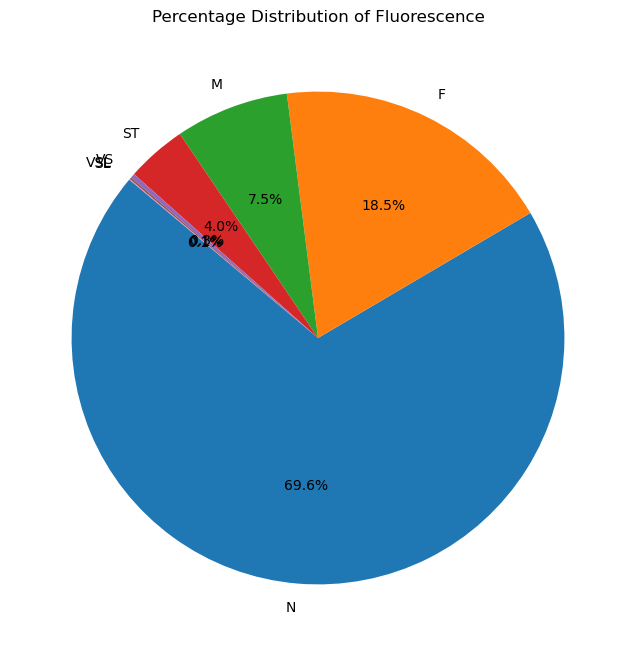

In [141]:
fluorescence_counts = Diamonds_prices['Fluorescence'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fluorescence_counts, labels=fluorescence_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Fluorescence')
plt.show()

Approximately 70% of the diamonds in the dataset are non-fluorescent, which may make it challenging to identify fluorescence from images. Additionally, it might not be a significant factor for price prediction. We will retain this feature for now but may consider dropping it later.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Correlation between the features</h4>
</div>

Our features are mostly categorical so to check correlation we cannot simply do a correlation matrix. We can do cross-tabulations for the features. This computes a frequency table of the data to show the relationship between different categorical variables. we then look into the p-value. a low p-value (<0.05) indicates a significant relationship between the 2 categories. We get the p-value from a statistical test named chi-2 test.

In [145]:
# List of categorical features to check correlation
categorical_features = ['Shape', 'Clarity', 'Colour', 'Cut', 'Polish', 'Symmetry', 'Fluorescence']

p_values_table = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Iterate over all combinations of the categorical features
for feature1, feature2 in combinations(categorical_features, 2):
    # Create a contingency table for the two features
    contingency_table = pd.crosstab(Diamonds_prices[feature1], Diamonds_prices[feature2])
    
    # the chi-square test 
    _, p, _, _ = chi2_contingency(contingency_table)
    
    # Store the p-value in the table (symmetric)
    p_values_table.loc[feature1, feature2] = p
    p_values_table.loc[feature2, feature1] = p

p_values_table



,Shape,Clarity,Colour,Cut,Polish,Symmetry,Fluorescence
Shape,NaN,0.0,0.0,0.0,0.0,0.0,0.0
Clarity,0.0,NaN,0.0,0.0,0.00005,0.0,0.00002
Colour,0.0,0.0,NaN,0.0,0.009568,0.0,0.0
Cut,0.0,0.0,0.0,NaN,0.0,0.0,0.284254
Polish,0.0,0.00005,0.009568,0.0,NaN,0.0,0.003836
Symmetry,0.0,0.0,0.0,0.0,0.0,NaN,0.000047
Fluorescence,0.0,0.00002,0.0,0.284254,0.003836,0.000047,NaN


Despite the features being correlated, I chose to maintain all of them in the model. This decision is based on the potential for non-linear interactions that could improve model performance, the valuable information each feature provides (as my knowledge of domain suggests), and the ability of certain models to handle multicollinearity effectively. By keeping all features, I ensure the model captures all aspects of the data, allowing for better predictive accuracy and future insights. Based on our model's performances, future improvements may incite me to reduce the dimensionality.

<div style="background-color:#FFDDC1; padding:8px; border-radius:5px; text-align:center; width:50%; margin:auto;">
    <h4 style="color:#8B4513; font-size:18px; margin:0;">Imbalanced data</h4>
</div>


Through the initial analysis and the initial predicitons, i noticed that there are some imbalanced data that may need our attention. I will look into this issue here

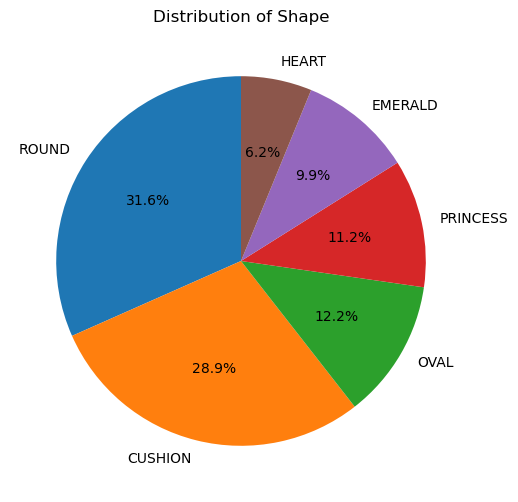

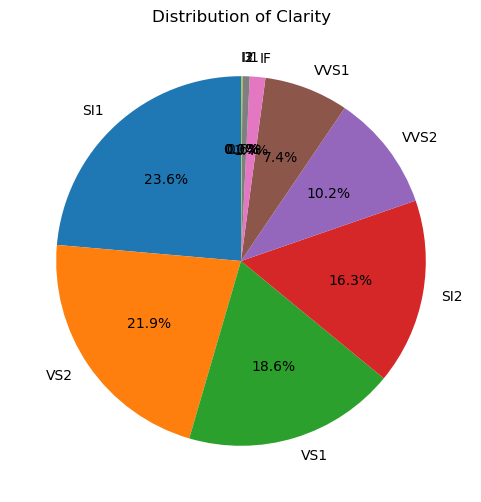

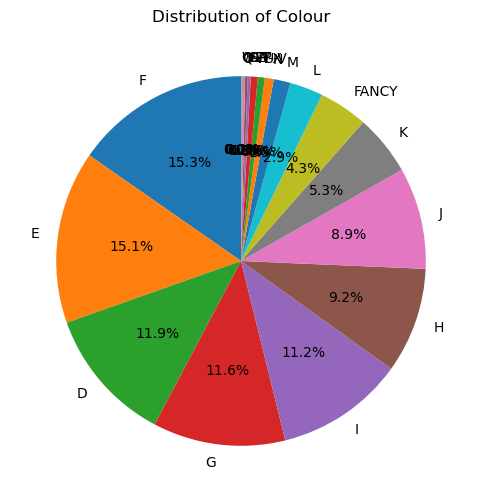

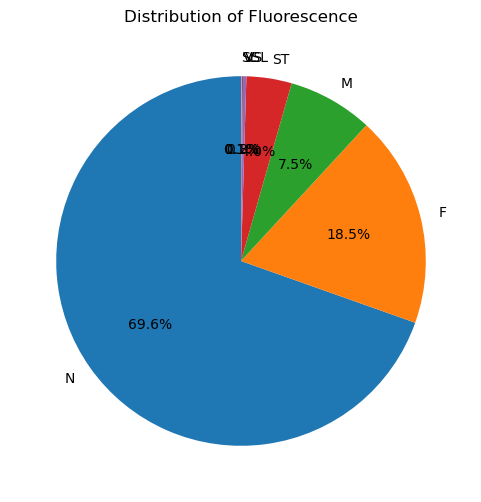

In [148]:
# List of features to look at (these are to be predicted from images)
features = ['Shape', 'Clarity', 'Colour', 'Fluorescence']

# Generate pie charts
for feature in features:
    plt.figure(figsize=(6, 6))
    Diamonds_prices[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
    plt.title(f"Distribution of {feature}")
    plt.ylabel('')  # Hide the y-axis label for clarity
    plt.show()


As these charts show us, there is imbalanced data in all of the features we would likek to predict. We will handle this in the predicition notebook.

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Encoding the prices dataset</h2>
</div>

I will transform the categorical features by mapping their values to corresponding numerical representations. This step ensures that the model can process and learn from these features effectively. As explained earlier in the data analysis, each feature ranges from "worst" to "best". When possible, in order to make encoding make sense, the better the category, the higher the numerical value. For example : 'EX': 3, 'VG': 2, 'GD': 1, 'F': 0

In [151]:
shape_mapping = {'CUSHION': 0, 'EMERALD': 1, 'HEART': 2, 'PRINCESS': 3, 'OVAL': 4, 'ROUND': 5} #no particular rank

clarity_mapping = {'I3': 0, 'I2': 1, 'I1': 2, 'SI2': 3, 'SI1': 4, 'VS2': 5, 'VS1': 6, 'VVS2': 7, 'VVS1': 8, 'IF': 9, 'FL': 10}

colour_mapping = {'FANCY': 19, 'D': 18, 'E': 17, 'F': 16, 'G': 15, 'H': 14, 'I': 13, 'J': 12, 'K': 11, 'L': 10, 'M': 9, 'N': 8, 'O': 7, 'O-P': 6, 'Q-R': 5, 'S-T': 4, 'U-V': 3, 'W': 2, 'W-X': 1, 'Y-Z': 0}

cut_mapping = { 'EX': 3, 'VG': 2, 'GD': 1, 'F': 0}

polish_mapping = { 'EX': 3, 'VG': 2, 'GD': 1, 'F': 0}

symmetry_mapping = {'EX': 3, 'VG': 2, 'GD': 1, 'FR': 0}

fluorescence_mapping = {'N': 0, 'F': 1, 'VSL': 2, 'SL': 3, 'M': 4, 'ST': 5, 'VS': 6} #no particular rank

Diamonds_prices['Shape_encoded'] = Diamonds_prices['Shape'].map(shape_mapping)
Diamonds_prices['Clarity_encoded'] = Diamonds_prices['Clarity'].map(clarity_mapping)
Diamonds_prices['Colour_encoded'] = Diamonds_prices['Colour'].map(colour_mapping)
Diamonds_prices['Cut_encoded'] = Diamonds_prices['Cut'].map(cut_mapping)
Diamonds_prices['Polish_encoded'] = Diamonds_prices['Polish'].map(polish_mapping)
Diamonds_prices['Symmetry_encoded'] = Diamonds_prices['Symmetry'].map(symmetry_mapping)
Diamonds_prices['Fluorescence_encoded'] = Diamonds_prices['Fluorescence'].map(fluorescence_mapping)
Diamonds_prices.drop(['Shape', 'Clarity','Colour','Cut','Polish','Symmetry','Fluorescence'], axis = 1, inplace =True)

Diamonds_prices


,Id,Weight,Price,Volume,Shape_encoded,Clarity_encoded,Colour_encoded,Cut_encoded,Polish_encoded,Symmetry_encoded,Fluorescence_encoded
0,1763395,0.50,1990.18,77.844613,5,3,17,2,2,2,0
1,1735493,0.50,2040.00,82.853604,5,3,16,3,2,2,0
2,1769508,0.40,1290.55,40.985776,1,6,16,3,2,1,0
3,1669926,0.50,2109.57,81.066640,5,7,12,3,3,3,0
4,1788940,0.80,2594.54,94.981032,0,3,17,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...
5947,1782992,0.50,1624.24,79.213680,4,4,16,3,3,1,0
5948,1793407,0.50,1646.18,58.473186,3,4,17,2,3,2,0
5950,1657065,0.50,2527.87,81.224640,5,6,15,3,3,2,1
5952,1791216,0.31,1103.47,47.190888,4,5,18,3,3,2,0


In [152]:
Diamonds_prices.isnull().sum()

Id                      0
Weight                  0
Price                   0
Volume                  0
Shape_encoded           0
Clarity_encoded         0
Colour_encoded          0
Cut_encoded             0
Polish_encoded          0
Symmetry_encoded        0
Fluorescence_encoded    0
dtype: int64

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Saving the datasets</h2>
</div>

Let's have one final look at our datasets before saving them into CSV files. We can now drop the Id column as we no longer need it.

In [155]:
Diamonds_prices.drop(['Id'],axis=1, inplace = True)
Diamonds_images.drop(['Id'],axis=1, inplace = True)

In [156]:
Diamonds_prices

,Weight,Price,Volume,Shape_encoded,Clarity_encoded,Colour_encoded,Cut_encoded,Polish_encoded,Symmetry_encoded,Fluorescence_encoded
0,0.50,1990.18,77.844613,5,3,17,2,2,2,0
1,0.50,2040.00,82.853604,5,3,16,3,2,2,0
2,0.40,1290.55,40.985776,1,6,16,3,2,1,0
3,0.50,2109.57,81.066640,5,7,12,3,3,3,0
4,0.80,2594.54,94.981032,0,3,17,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...
5947,0.50,1624.24,79.213680,4,4,16,3,3,1,0
5948,0.50,1646.18,58.473186,3,4,17,2,3,2,0
5950,0.50,2527.87,81.224640,5,6,15,3,3,2,1
5952,0.31,1103.47,47.190888,4,5,18,3,3,2,0


In [157]:
Diamonds_images

,Shape,Clarity,Colour,Fluorescence,Image_URL
0,ROUND,SI2,E,N,./Images/round/1763395.jpg
2,EMERALD,VS1,F,N,./Images/emerald/1769508.jpg
5,ROUND,SI1,E,N,./Images/round/1655964.jpg
6,EMERALD,VVS2,F,N,./Images/emerald/1799816.jpg
8,ROUND,VS2,F,N,./Images/round/1758652.jpg
...,...,...,...,...,...
5947,OVAL,SI1,F,N,./Images/oval/1782992.jpg
5948,PRINCESS,SI1,E,N,./Images/princess/1793407.jpg
5950,ROUND,VS1,G,F,./Images/round/1657065.jpg
5952,OVAL,VS2,D,N,./Images/oval/1791216.jpg


In [158]:
Diamonds_prices.to_csv('Diamonds_prices.csv', index=False)
Diamonds_images.to_csv('Diamonds_images.csv', index=False)

<div style="background-color:#ADD8E6; padding:10px; border-radius:5px; text-align:center">
    <h2 style="color:#000080;">Conclusion</h2>
</div>

We prepared our dataset for both price prediction and image-based assessment. Through data analysis, we gained a deeper understanding of the dataset's behavior. Although we couldn't directly study correlations using a correlation matrix due to the predominantly categorical nature of the data, analyzing each feature individually was insightful. Additionally, we discovered an interesting insight regarding the fluorescence feature, which suggests that we may need to drop it in the future.